In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
np.random.seed(42)

num_samples = 1000

Pclass = np.random.randint(1, 4, size=num_samples)

Sex = np.random.choice(['male', 'female'], size=num_samples)

Age = np.random.randint(0, 101, size=num_samples)

Fare = np.random.uniform(0, 300, size=num_samples)

Survived = np.random.randint(0, 2, size=num_samples)

titanic_data = {
    'Pclass': Pclass,
    'Sex': Sex,
    'Age': Age,
    'Fare': Fare,
    'Survived': Survived
}

In [6]:
titanic_df = pd.DataFrame(titanic_data)

In [7]:
print(titanic_df)

     Pclass     Sex  Age        Fare  Survived
0         3    male   16   12.501870         0
1         1    male   94   25.437605         1
2         3    male   97  214.897016         0
3         3    male   59   21.625301         0
4         1  female   63   21.377018         0
..      ...     ...  ...         ...       ...
995       2    male   43  298.445788         1
996       2  female   64  213.516842         1
997       3    male   86  294.343120         0
998       3    male  100  170.861934         0
999       1    male    7   77.862535         1

[1000 rows x 5 columns]


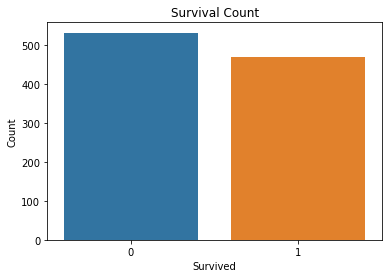

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

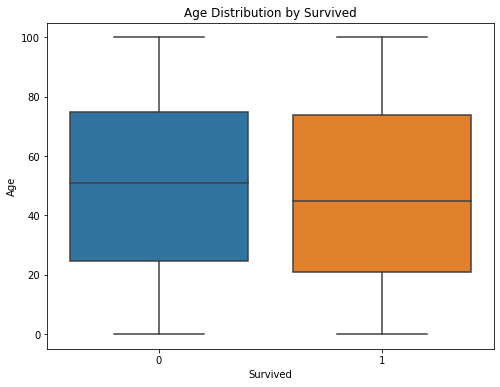

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

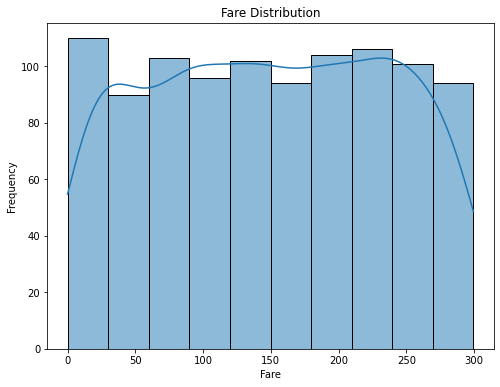

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['Fare'], bins=10, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

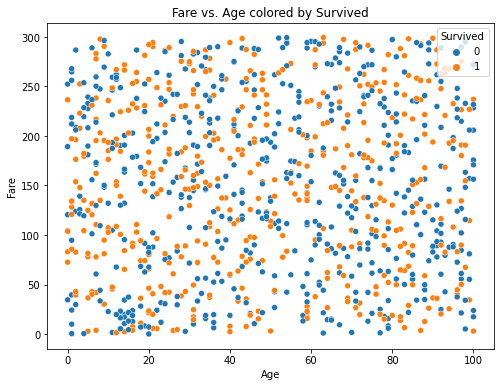

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Fare vs. Age colored by Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
X = titanic_df[['Pclass', 'Sex', 'Age', 'Fare']] 
y = titanic_df['Survived'] 

In [17]:
X = pd.get_dummies(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = svm.SVC()

In [20]:
model.fit(X_train, y_train)

SVC()

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.535


In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.88      0.67       109
           1       0.46      0.12      0.19        91

    accuracy                           0.54       200
   macro avg       0.50      0.50      0.43       200
weighted avg       0.51      0.54      0.45       200



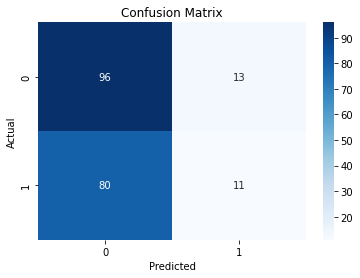

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()